# Portfolio-analysis-ML

In [21]:
!pip install pandas
!pip install cufflinks plotly

     |████████████████████████████████| 81kB 798kB/s eta 0:00:01
     |████████████████████████████████| 7.2MB 5.6MB/s eta 0:00:01     |███████████████████████         | 5.1MB 1.9MB/s eta 0:00:02


  Created wheel for cufflinks: filename=cufflinks-0.17.3-cp37-none-any.whl size=67921 sha256=2f80098ef8303b58352f88b7aa72684d75ccd7f8cf6e95d220e08a53831a63bb
  Stored in directory: /home/gerarso/.cache/pip/wheels/7d/ba/8d/38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=94850edead683dd66a8ef056ac747916a754d4539f16b96febd456770949d61b
  Stored in directory: /home/gerarso/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built cufflinks retrying


In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [18]:
histrial_stock =  { i.split(".")[0]:pd.read_csv("./data/"+i) for i in  os.listdir('./data') }

In [65]:
histrial_stock['VOLARA'] = histrial_stock['VOLARA'][len(histrial_stock['VOLARA'])-30:]

In [66]:
%matplotlib notebook

<IPython.core.display.Javascript object>


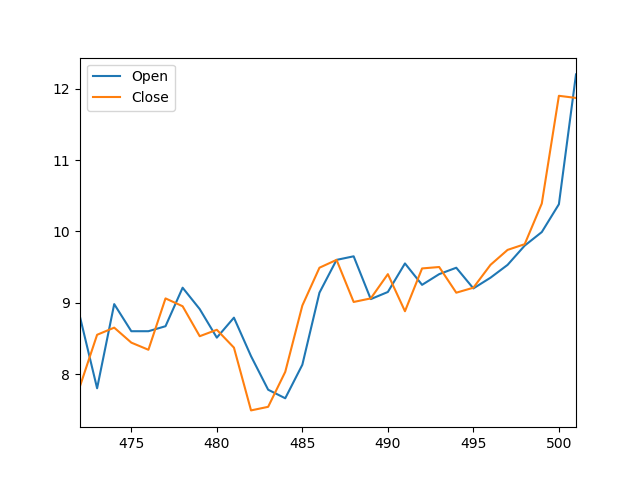

In [67]:
df = histrial_stock['VOLARA'][['Open','Close']]
df.plot(); plt.legend(loc='best')

## Buesqueda de rangos minimos de entrada y maximos de salida 

/home/gerarso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


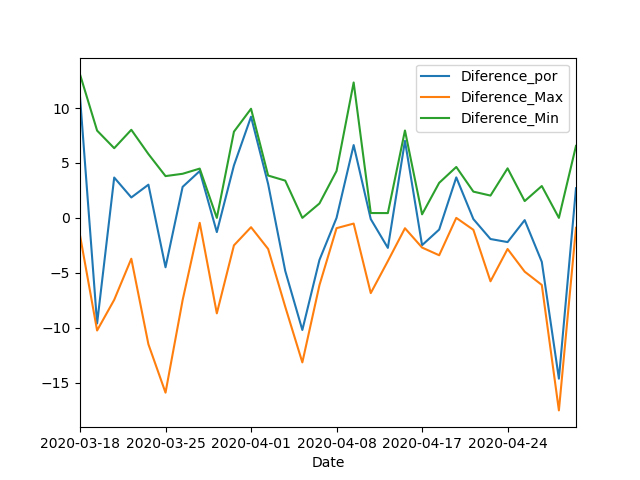

In [68]:
df = histrial_stock['VOLARA'][['Open','Close','Date','High','Low']]
df['Diference_por'] = df[['Open','Close']].apply(lambda row: (row['Open']-row['Close'])*100/row['Open'] , axis=1)
df['Diference_Max'] = df[['Open','High']].apply(lambda row: (row['Open']-row['High'])*100/row['Open'] , axis=1)
df['Diference_Min'] = df[['Open','Low']].apply(lambda row: (row['Open']-row['Low'])*100/row['Open'] , axis=1)
df[['Diference_por','Diference_Max','Diference_Min','Date' ]].plot(x='Date')

## probabilidad de entrada y salida

In [82]:
df['Proba_entrada'] = df[['Diference_por','Diference_Min','Low','Date']].apply(lambda row: row['Diference_Min']>3 , axis=1)
#df[['Diference_por','Diference_Max','Diference_Min','Date' ]].plot(x='Date')

In [83]:
df['Proba_entrada'].sum()/len(df['Proba_entrada'])

0.6333333333333333

In [ ]:
df['Proba_salida'] = df[['Diference_por','Diference_Max','Low','Date']].apply(lambda row: row['Diference_Max']>3 , axis=1)